# WorldQuant University  
## (19/09) MScFE 640 Portfolio Theory and Asset Pricing (C18-S4)
## Group work Assignment  \ :: \  Timezone Group 2-D   \ :: \ Submission 1

Tea Toradze (tea_tor@yahoo.com)

In [0]:
# Upload excel file to temporary working environment
from google.colab import files
uploaded = files.upload()

Saving g GWP_PTAP_Data.xlsx to g GWP_PTAP_Data.xlsx


In [0]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = [13, 7]

## 1 (a) CAPM

In [0]:
### 1 (a) CAPM

# Compute expected returns according to the CAPM
XLE_beta = 1.07
XLI_beta = 1.06
Rf = 0.0225
Rm = 0.09

E_R_xle = (Rf + XLE_beta * (Rm - Rf)) * 100
E_R_xli = (Rf + XLI_beta * (Rm - Rf)) * 100

print('XLE expected return: {}%'.format(E_R_xle))
print('XLI expected return: {}%'.format(E_R_xli))

XLE expected return: 9.4725%
XLI expected return: 9.405%


## 1 (b) Standard deviation of log returns

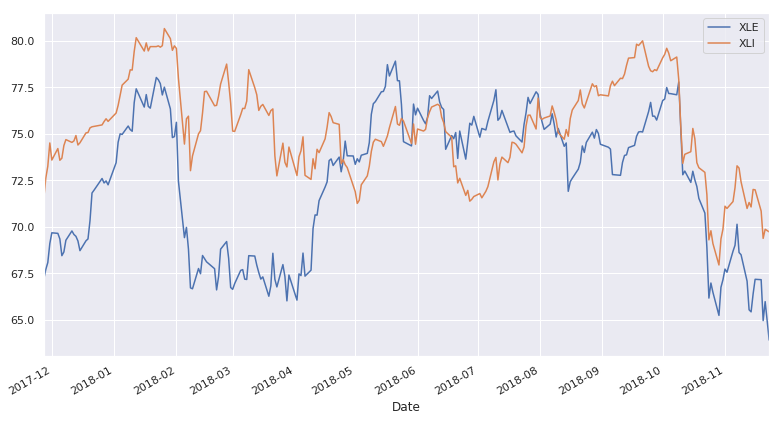

In [0]:
### 1 (b) STD of log returns

# Import data from excel file
XLE = pd.read_excel('g GWP_PTAP_Data.xlsx', skiprows=1, sheet_name=0)
XLI = pd.read_excel('g GWP_PTAP_Data.xlsx', skiprows=1, sheet_name=1)

# Plot closing prices on the same plot
pd.DataFrame({'XLE':XLE['Closing price'].values, 'XLI':XLI['Closing price'].values}, 
             index = XLE.Date).plot()
plt.show()

In [0]:
# Compute log returns for XLE
XLE['logReturn'] = np.log(XLE['Closing price']) - np.log(XLE['Closing price'].shift(1))
xle = XLE[1:]   # Removing first row with NaN return value

# Compute log returns for XLI
XLI['logReturn'] = np.log(XLI['Closing price']) - np.log(XLI['Closing price'].shift(1))
xli = XLI[1:]

# Compute daily standard deviation of returns 
XLE_daily_std = xle.logReturn.std()
XLI_daily_std = xli.logReturn.std()

In [0]:
# Print daily standard deviation of returns
print('XLE daily std: {}%'.format(round(XLE_daily_std * 100, 2)))
print('XLI daily std: {}%'.format(round(XLI_daily_std * 100, 2)))

# Print annualized standard deviation of returns 
# (Note: we multiply the daily standard deviation by
# square root of 252 - the number of trading days in one year)
print('XLE annualized std: {}%'.format(round(XLE_daily_std * np.sqrt(252) * 100, 2)))
print('XLI annualized std: {}%'.format(round(XLI_daily_std * np.sqrt(252) * 100, 2)))


XLE daily std: 1.28%
XLI daily std: 1.08%
XLE annualized std: 20.32%
XLI annualized std: 17.12%


## 1 (c) Correlation

In [0]:
### 1 (c) Correlation

# Correlation of returns
corr_matrix = pd.DataFrame({'xle':xle.logReturn, 'xli':xli.logReturn}).corr()
corr_matrix

,xle,xli
xle,1.00000,0.65965
xli,0.65965,1.00000


In [0]:
print('Correlation coefficient: {}'.format(round(corr_matrix.xle[1], 2)))


Correlation coefficient: 0.66




---



---


## Additional remarks

## Note about standard deviation

We could calculate standard deviation using numpy package. 

It will return the standard deviation of the population according to this formula:

$
    \sqrt{\frac{\Sigma_{k=1}^n (x_k - \hat{x})^2 }{n} }
$

This will be the same as returned by numpy.std as demonstrated below:

In [0]:
# Numpy std
numpy_std_analytic = np.sqrt(np.sum((xle.logReturn - xle.logReturn.mean())**2)/(xle.shape[0]))
numpy_std_npcode = np.std(xle.logReturn)

print('numpy_std_analytic: {}%'.format(numpy_std_analytic))
print('numpy_std_pdcode: {}%'.format(numpy_std_npcode))


numpy_std_analytic: 0.012774489598810935%
numpy_std_pdcode: 0.012774489598810937%


But std function from pandas package returns "unbiased standard deviation", 

i.e. the sample standard deviation which is calculated as:

$
    \sqrt{\frac{\Sigma_{k=1}^n (x_k - \hat{x})^2 }{n-1} }
$

And this gives same return as pandas.DataFrame.std as shown below:

In [0]:
# Pandas std
pandas_std_analytic = np.sqrt(np.sum((xle.logReturn - xle.logReturn.mean())**2)/(xle.shape[0]-1))
pandas_std_pdcode = xle.logReturn.std()

print('pandas_std_analytic: {}%'.format(pandas_std_analytic))
print('pandas_std_pdcode: {}%'.format(pandas_std_pdcode))


pandas_std_analytic: 0.012800115481333387%
pandas_std_pdcode: 0.012800115481333389%


Numpy and Pandas give slightly different results.

This is due to diferent std formulae employed to arrive at std value.


In our project we use pandas version of std calculation 

because we deal with a sample of returns, not the whole population.

## Correlation matrix of prices from tab 3 in excel file

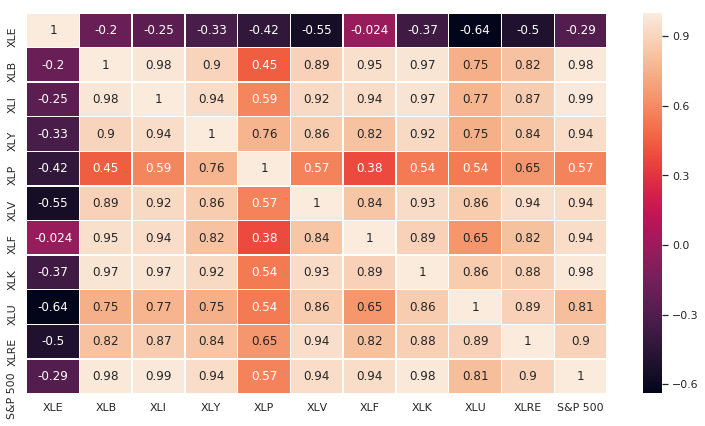

In [0]:
# Correlation matrix

# Import data from tab '10 SPDRs and S&P 500' provided in excel file
tab3 = pd.read_excel('g GWP_PTAP_Data.xlsx', skiprows=1, sheet_name=2)

# Comoute correlation matrix of returns with a heatmap
correlation_matrix = tab3.corr()
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt=".2g")
